<a href="https://colab.research.google.com/github/shambhavii13/SudokuSolver/blob/main/Sudoku_Solver.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [93]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import random
from PIL import Image
import operator

In [94]:
im = Image.open("sudoku.jpg")
print(im.size)
# im.show()

(962, 1024)


In [95]:
img=np.asarray(im) #converted to array
imgg=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# print(im.format)
# print(imgg.format)
proc = cv2.GaussianBlur(img.copy(), (9, 9), 0) #gaussian blur,kernel sizes must be positive and odd and the kernel must be square
# Image.fromarray(proc, "RGB").show() #to display image
proc_gray = cv2.cvtColor(proc, cv2.COLOR_BGR2GRAY)
proc = cv2.adaptiveThreshold(proc_gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2) #Pixels that have intensities
                               # above the threshold will be set to the maximum value of 255, while pixels below the threshold will be set to 0.
# Image.fromarray(proc, ).show()


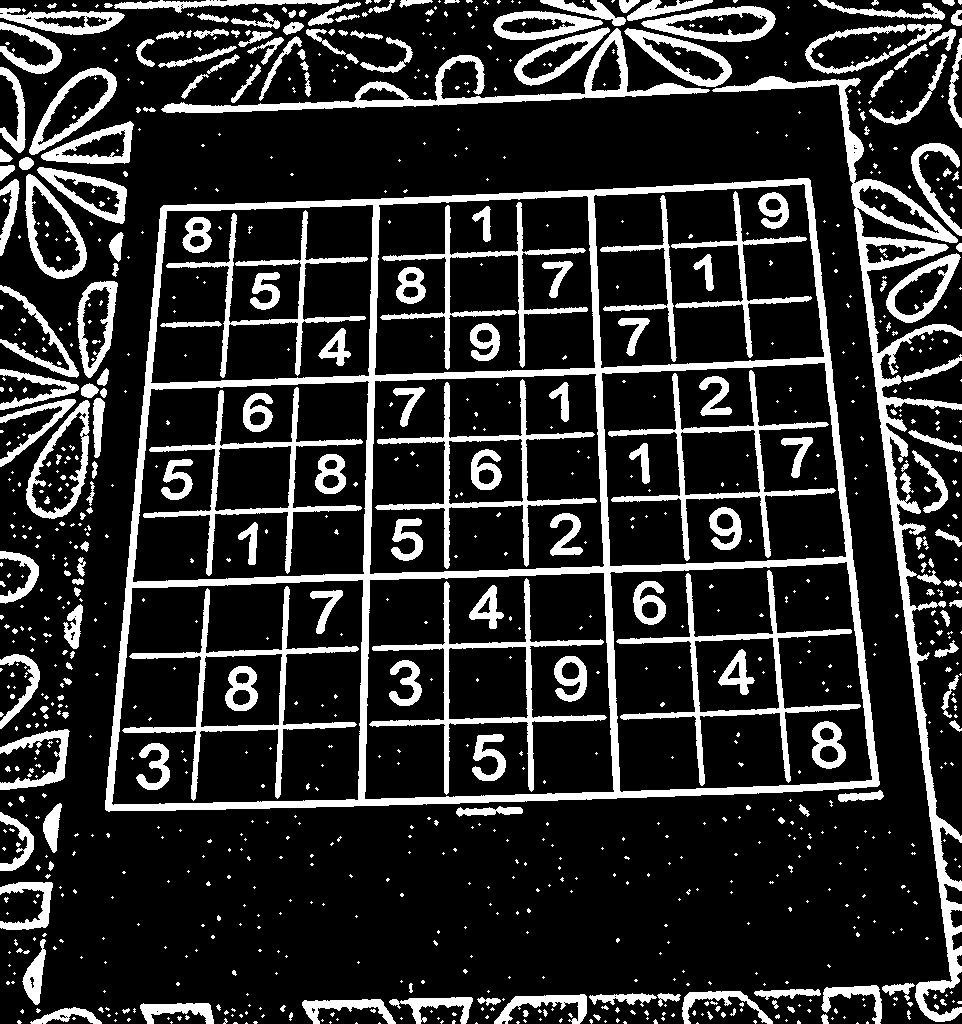

In [96]:
proc = cv2.bitwise_not(proc, proc) #bitwise inversion
kernel = np.array([[0., 1., 0.], [1., 1., 1.], [0., 1., 0.]],np.uint8) #basically a + like struc which will move over the image
proc = cv2.dilate(proc, kernel)#when non zero kernel overlaps with non zero pixel =>sets non zero value
Image.fromarray(proc, ).show()

In [97]:
#to get corners of our big square

contours, h = cv2.findContours(proc.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
# print(contours)
contours = sorted(contours, key=cv2.contourArea, reverse=True) #sorts the contours list based on the area of each contour in descending order
# print(contours)
polygon = contours[0]
print(polygon)


[[[798 178]]

 [[797 179]]

 [[784 179]]

 [[783 180]]

 [[766 180]]

 [[765 181]]

 [[751 181]]

 [[750 182]]

 [[734 182]]

 [[733 183]]

 [[732 182]]

 [[731 183]]

 [[714 183]]

 [[713 184]]

 [[694 184]]

 [[693 185]]

 [[673 185]]

 [[672 186]]

 [[656 186]]

 [[655 187]]

 [[636 187]]

 [[635 188]]

 [[613 188]]

 [[612 189]]

 [[595 189]]

 [[594 190]]

 [[568 190]]

 [[567 191]]

 [[548 191]]

 [[547 192]]

 [[546 192]]

 [[545 191]]

 [[544 192]]

 [[523 192]]

 [[522 193]]

 [[499 193]]

 [[498 194]]

 [[476 194]]

 [[475 195]]

 [[452 195]]

 [[451 196]]

 [[429 196]]

 [[428 197]]

 [[404 197]]

 [[403 198]]

 [[381 198]]

 [[380 199]]

 [[351 199]]

 [[350 200]]

 [[325 200]]

 [[324 201]]

 [[296 201]]

 [[295 202]]

 [[267 202]]

 [[266 203]]

 [[265 202]]

 [[264 203]]

 [[235 203]]

 [[234 204]]

 [[187 204]]

 [[186 205]]

 [[163 205]]

 [[160 208]]

 [[160 218]]

 [[159 219]]

 [[159 231]]

 [[158 232]]

 [[158 241]]

 [[157 242]]

 [[157 252]]

 [[156 253]]

 [[156

In [98]:
bottom_right, _ = max(enumerate([pt[0][0] + pt[0][1] for pt in
                      polygon]), key=operator.itemgetter(1))
print(bottom_right,"br")
top_left, _ = min(enumerate([pt[0][0] + pt[0][1] for pt in
                  polygon]), key=operator.itemgetter(1))
print(top_left,"tl")
bottom_left, _ = max(enumerate([pt[0][0] - pt[0][1] for pt in
                     polygon]), key=operator.itemgetter(1))
top_right, _ = min(enumerate([pt[0][0] - pt[0][1] for pt in
                   polygon]), key=operator.itemgetter(1))
print(bottom_left,"bl")
print(top_right,"tr")
print([polygon[top_left][0], polygon[top_right][0], polygon[bottom_right][0], polygon[bottom_left][0]])

239 br
61 tl
389 bl
175 tr
[array([163, 205], dtype=int32), array([105, 809], dtype=int32), array([877, 786], dtype=int32), array([810, 180], dtype=int32)]


In [99]:
top_left1, top_right1, bottom_right1, bottom_left1=polygon[top_left][0], polygon[top_right][0], polygon[bottom_right][0], polygon[bottom_left][0]
# top_left, top_right, bottom_right, bottom_left = crop_rect[0], crop_rect[1], crop_rect[2], crop_rect[3]
src = np.array([top_left1, top_right1, bottom_right1, bottom_left1], dtype='float32')
print(src)
def distance_between(p1, p2):
    a = p2[0] - p1[0]
    b = p2[1] - p1[1]
    return np.sqrt((a ** 2) + (b ** 2))
side = max([  distance_between(bottom_right1, top_right1),
            distance_between(top_left1, bottom_left1),
            distance_between(bottom_right1, bottom_left1),
            distance_between(top_left1, top_right1) ])
print(side) #we have largest side for square

[[163. 205.]
 [105. 809.]
 [877. 786.]
 [810. 180.]]
772.3425405867529


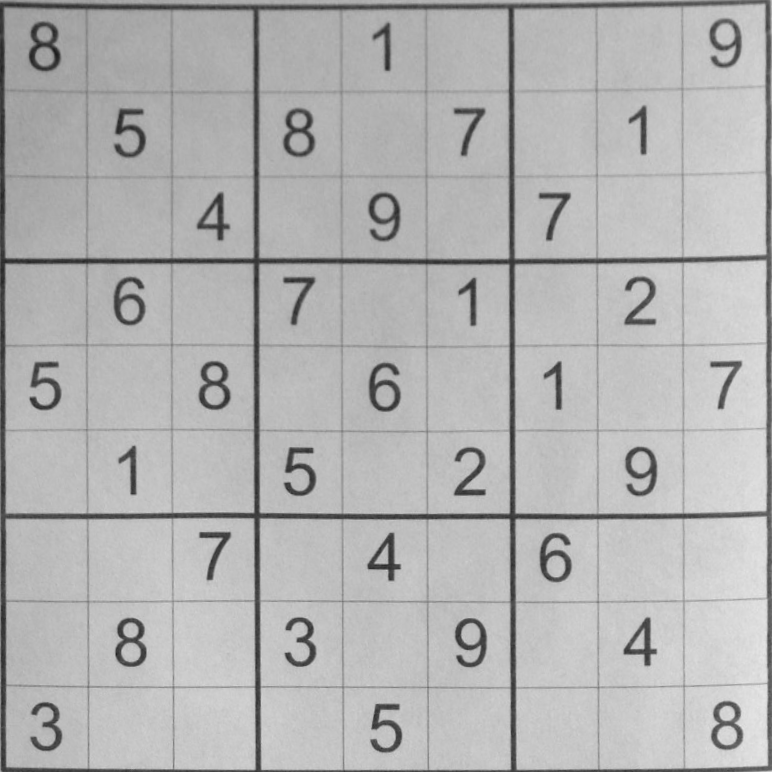

595984


In [100]:
dst = np.array([[0, 0], [0, side-1], [side - 1, side - 1], [ side - 1,0]], dtype='float32') #square of size 1023
# print(src,"kkp")
# print(dst,"lp")
m = cv2.getPerspectiveTransform(src, dst)# maps the source points to their corresponding destination points
# print(m,"mm")
wimg=cv2.warpPerspective(imgg, m, (int(side), int(side))) #applies the perspective transformation to img using transformation matrix m.
#The resulting transformed image will have the specified size (int(side), int(side))
# wimg2=cv2.resize(wimg,(405,405))
Image.fromarray(wimg, ).show()
print(wimg.size)


In [101]:
squares = []
side = wimg.shape[:1]
side = side[0] / 9
for j in range(9):
    for i in range(9):
        p1 = (i * side, j * side)  #Top left corner of a box
        p2 = ((i + 1) * side, (j + 1) * side)  #Bottom right corner
        squares.append((p1, p2))
print(len(squares))
print(squares)

81
[((0.0, 0.0), (85.77777777777777, 85.77777777777777)), ((85.77777777777777, 0.0), (171.55555555555554, 85.77777777777777)), ((171.55555555555554, 0.0), (257.3333333333333, 85.77777777777777)), ((257.3333333333333, 0.0), (343.1111111111111, 85.77777777777777)), ((343.1111111111111, 0.0), (428.88888888888886, 85.77777777777777)), ((428.88888888888886, 0.0), (514.6666666666666, 85.77777777777777)), ((514.6666666666666, 0.0), (600.4444444444443, 85.77777777777777)), ((600.4444444444443, 0.0), (686.2222222222222, 85.77777777777777)), ((686.2222222222222, 0.0), (772.0, 85.77777777777777)), ((0.0, 85.77777777777777), (85.77777777777777, 171.55555555555554)), ((85.77777777777777, 85.77777777777777), (171.55555555555554, 171.55555555555554)), ((171.55555555555554, 85.77777777777777), (257.3333333333333, 171.55555555555554)), ((257.3333333333333, 85.77777777777777), (343.1111111111111, 171.55555555555554)), ((343.1111111111111, 85.77777777777777), (428.88888888888886, 171.55555555555554)), ((

In [102]:
def cut_from_rect(img, rect):
	"""Cuts a rectangle from an image using the top left and bottom right points."""
	return img[int(rect[0][1]):int(rect[1][1]), int(rect[0][0]):int(rect[1][0])]
def find_largest_feature(inp_img, scan_tl=None, scan_br=None):
	"""
	Uses the fact the `floodFill` function returns a bounding box of the area it filled to find the biggest
	connected pixel structure in the image. Fills this structure in white, reducing the rest to black.
	"""
	img = inp_img.copy()  # Copy the image, leaving the original untouched
	height, width = img.shape[:2]

	max_area = 0
	seed_point = (None, None)

	if scan_tl is None:
		scan_tl = [0, 0]

	if scan_br is None:
		scan_br = [width, height]

	# Loop through the image
	for x in range(scan_tl[0], scan_br[0]):
		for y in range(scan_tl[1], scan_br[1]):
			# Only operate on light or white squares
			if img.item(y, x) == 255 and x < width and y < height:  # Note that .item() appears to take input as y, x
				area = cv2.floodFill(img, None, (x, y), 64)
				if area[0] > max_area:  # Gets the maximum bound area which should be the grid
					max_area = area[0]
					seed_point = (x, y)

	# Colour everything grey (compensates for features outside of our middle scanning range
	for x in range(width):
		for y in range(height):
			if img.item(y, x) == 255 and x < width and y < height:
				cv2.floodFill(img, None, (x, y), 64)

	mask = np.zeros((height + 2, width + 2), np.uint8)  # Mask that is 2 pixels bigger than the image

	# Highlight the main feature
	if all([p is not None for p in seed_point]):
		cv2.floodFill(img, mask, seed_point, 255)

	top, bottom, left, right = height, 0, width, 0

	for x in range(width):
		for y in range(height):
			if img.item(y, x) == 64:  # Hide anything that isn't the main feature
				cv2.floodFill(img, mask, (x, y), 0)

			# Find the bounding parameters
			if img.item(y, x) == 255:
				top = y if y < top else top
				bottom = y if y > bottom else bottom
				left = x if x < left else left
				right = x if x > right else right

	bbox = [[left, top], [right, bottom]]
	return img, np.array(bbox, dtype='float32'), seed_point
def scale_and_centre(img, size, margin=0, background=0):
	"""Scales and centres an image onto a new background square."""
	h, w = img.shape[:2]

	def centre_pad(length):
		"""Handles centering for a given length that may be odd or even."""
		if length % 2 == 0:
			side1 = int((size - length) / 2)
			side2 = side1
		else:
			side1 = int((size - length) / 2)
			side2 = side1 + 1
		return side1, side2

	def scale(r, x):
		return int(r * x)

	if h > w:
		t_pad = int(margin / 2)
		b_pad = t_pad
		ratio = (size - margin) / h
		w, h = scale(ratio, w), scale(ratio, h)
		l_pad, r_pad = centre_pad(w)
	else:
		l_pad = int(margin / 2)
		r_pad = l_pad
		ratio = (size - margin) / w
		w, h = scale(ratio, w), scale(ratio, h)
		t_pad, b_pad = centre_pad(h)

	img = cv2.resize(img, (w, h))
	img = cv2.copyMakeBorder(img, t_pad, b_pad, l_pad, r_pad, cv2.BORDER_CONSTANT, None, background)
	return cv2.resize(img, (size, size))
def extract_digit(img, rect, size):
	"""Extracts a digit (if one exists) from a Sudoku square."""

	digit = cut_from_rect(img, rect)  # Get the digit box from the whole square
	Image.fromarray(digit, ).show()
	# Use fill feature finding to get the largest feature in middle of the box
	# Margin used to define an area in the middle we would expect to find a pixel belonging to the digit
	h, w = digit.shape[:2]
	margin = int(np.mean([h, w]) / 2.5)
	_, bbox, seed = find_largest_feature(digit, [margin, margin], [w - margin, h - margin])
	digit = cut_from_rect(digit, bbox)

	# Scale and pad the digit so that it fits a square of the digit size we're using for machine learning
	w = bbox[1][0] - bbox[0][0]
	h = bbox[1][1] - bbox[0][1]

	# Ignore any small bounding boxes
	if w > 0 and h > 0 and (w * h) > 100 and len(digit) > 0:
		return scale_and_centre(digit, size, 4)
	else:
		return np.zeros((size, size), np.uint8)

In [103]:
#preprocess wimg
proc2 = cv2.GaussianBlur(wimg.copy(), (9, 9), 0)
proc2 = cv2.adaptiveThreshold(proc2, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)
proc2 = cv2.bitwise_not(proc2, proc2)

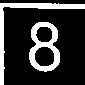

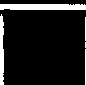

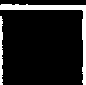

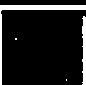

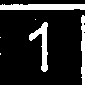

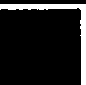

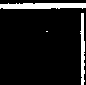

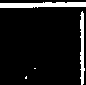

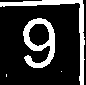

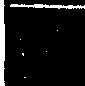

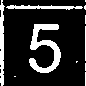

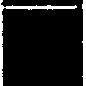

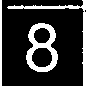

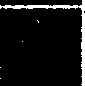

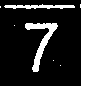

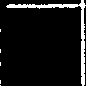

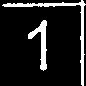

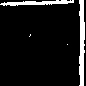

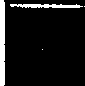

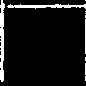

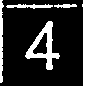

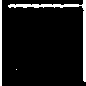

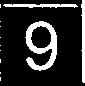

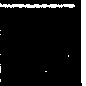

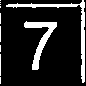

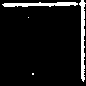

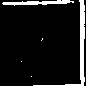

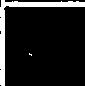

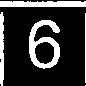

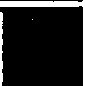

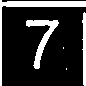

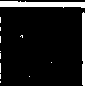

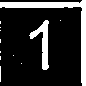

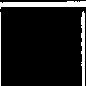

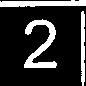

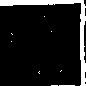

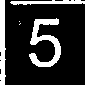

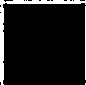

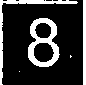

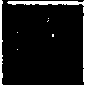

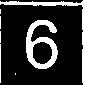

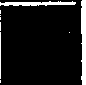

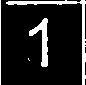

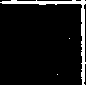

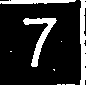

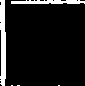

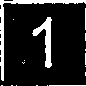

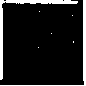

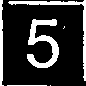

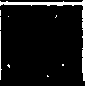

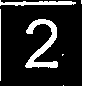

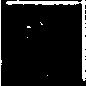

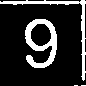

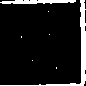

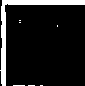

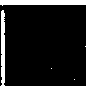

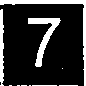

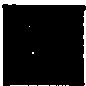

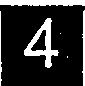

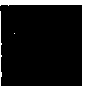

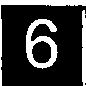

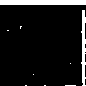

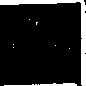

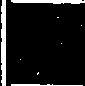

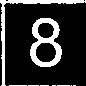

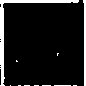

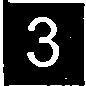

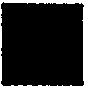

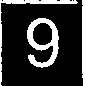

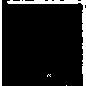

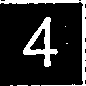

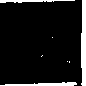

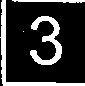

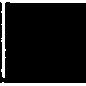

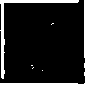

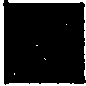

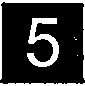

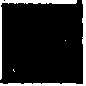

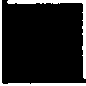

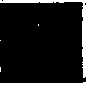

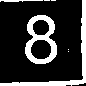

In [104]:
digits = []
for square in squares:
    digits.append(extract_digit(proc2.copy(), square, 28))
Image.fromarray(digits[0], ).show()

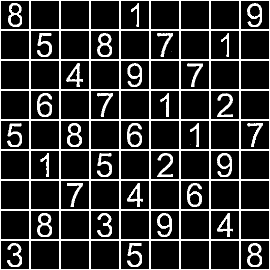

In [105]:
def show_digits(digits, colour=255):
    """Shows list of 81 extracted digits in a grid format"""
    rows = []
    with_border = [cv2.copyMakeBorder(img.copy(), 1, 1, 1, 1, cv2.BORDER_CONSTANT, None, colour) for img in digits]
    for i in range(9):
        row = np.concatenate(with_border[i * 9:((i + 1) * 9)], axis=1)
        rows.append(row)
    img = np.concatenate(rows)
    return img
final_image = show_digits(digits)
Image.fromarray(final_image, ).show()

In [120]:
#imports for training

import matplotlib.pyplot as plt
import numpy as np
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.utils import np_utils
from keras import backend as K
import matplotlib.pyplot as plt
import cv2

In [121]:
seed=7
seed = np.random.seed(seed)
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.reshape(X_train.shape[0], 28, 28,
                           1).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 28, 28,
                           1).astype('float32')
X_train = X_train / 255
X_test = X_test / 255
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]


In [132]:
#model
model = Sequential()
model.add(Conv2D(32, (5, 5), input_shape=(28, 28,1), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(16, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20, batch_size=200)

Epoch 1/20
300/300 [==============================] - 47s 151ms/step - loss: 0.3644 - accuracy: 0.8881 - val_loss: 0.0778 - val_accuracy: 0.9764
Epoch 2/20
300/300 [==============================] - 46s 153ms/step - loss: 0.0904 - accuracy: 0.9727 - val_loss: 0.0517 - val_accuracy: 0.9843
Epoch 3/20
300/300 [==============================] - 56s 186ms/step - loss: 0.0646 - accuracy: 0.9805 - val_loss: 0.0385 - val_accuracy: 0.9873
Epoch 4/20
300/300 [==============================] - 47s 158ms/step - loss: 0.0521 - accuracy: 0.9835 - val_loss: 0.0284 - val_accuracy: 0.9911
Epoch 5/20
300/300 [==============================] - 50s 167ms/step - loss: 0.0443 - accuracy: 0.9860 - val_loss: 0.0290 - val_accuracy: 0.9911
Epoch 6/20
300/300 [==============================] - 47s 156ms/step - loss: 0.0397 - accuracy: 0.9872 - val_loss: 0.0301 - val_accuracy: 0.9909
Epoch 7/20
300/300 [==============================] - 55s 183ms/step - loss: 0.0343 - accuracy: 0.9892 - val_loss: 0.0258 - val_ac

In [134]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("Large CNN Error: %.2f%%" % (100-scores[1]*100))

Large CNN Error: 0.61%


Test images shape: (4, 28, 28)
1/1 [==============================] - 0s 110ms/step
Predicted digit: 2
1/1 [==============================] - 0s 26ms/step
Predicted digit: 1
1/1 [==============================] - 0s 22ms/step
Predicted digit: 0
1/1 [==============================] - 0s 21ms/step
Predicted digit: 4


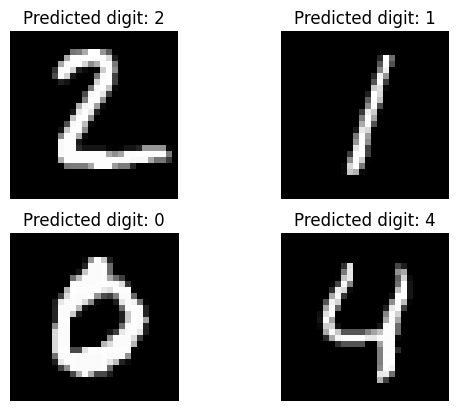

In [135]:
import numpy as np
import matplotlib.pyplot as plt

test_images = X_test[1:5]
test_images = test_images.reshape(test_images.shape[0], 28, 28)
print("Test images shape: {}".format(test_images.shape))

for i, test_image in enumerate(test_images, start=1):
    org_image = test_image
    test_image = test_image.reshape(1, 28, 28, 1)  # Correct the reshaping here
    probabilities = model.predict(test_image)
    predicted_class = np.argmax(probabilities)

    print("Predicted digit: {}".format(predicted_class))

    plt.subplot(220 + i)
    plt.axis('off')
    plt.title("Predicted digit: {}".format(predicted_class))
    plt.imshow(org_image, cmap=plt.get_cmap('gray'))

plt.show()


In [136]:
model_json = model.to_json()
with open("modelf.json", "w") as json_file:
    json_file.write(model_json)
model.save_weights("modelf.h5")

In [ ]:
from google.colab import files

files.download("model.json")
files.download("model.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [126]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Save model to Google Drive
model.save('/content/drive/My Drive/Models/my_modelf.h5')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [137]:
import json
from keras.models import model_from_json
with open('modelf.json', 'r') as json_file:
    loaded_model_json = json_file.read()
loaded_model = model_from_json(loaded_model_json)
loaded_model.load_weights('modelf.h5')

In [138]:
def identify_number(image):
    image_resize = cv2.resize(image, (28,28))
    image_resize_2 = image_resize.reshape(1,28,28,1)
    loaded_model_pred = loaded_model.predict(image_resize_2 , verbose = 0)
    return np.argmax(loaded_model_pred[0])

In [148]:
sudoku = cv2.resize(final_image.copy(), (450,450))
grid = np.zeros([9,9])
for i in range(9):
    for j in range(9):
        image = sudoku[i*50:(i+1)*50,j*50:(j+1)*50]
        if image.sum() > 80000:
            grid[i][j] = identify_number(image)
        else:
            grid[i][j] = 0
grid =  grid.astype(int)


In [149]:
print(grid)

[[8 0 0 0 7 0 0 0 9]
 [0 5 0 8 0 7 0 7 0]
 [0 0 4 0 9 0 7 0 0]
 [0 6 0 7 0 7 0 2 0]
 [5 0 8 0 6 0 7 0 7]
 [0 7 0 5 0 2 0 9 0]
 [0 0 7 0 4 0 6 0 0]
 [0 8 0 3 0 9 0 4 0]
 [3 0 0 0 5 0 0 0 8]]


In [141]:
def find_empty_location(arr,l):
	for row in range(9):
		for col in range(9):
			if(arr[row][col]==0):
				l[0]=row
				l[1]=col
				return True
	return False

# Returns a boolean which indicates whether any assigned entry in the specified row matches the given number.
def used_in_row(arr,row,num):
	for i in range(9):
		if(arr[row][i] == num):
			return True
	return False

# Returns a boolean which indicates whether any assigned entry in the specified column matches the given number.
def used_in_col(arr,col,num):
	for i in range(9):
		if(arr[i][col] == num):
			return True
	return False

# Returns a boolean which indicates whether any assigned entry within the specified 3x3 box matches the given number
def used_in_box(arr,row,col,num):
	for i in range(3):
		for j in range(3):
			if(arr[i+row][j+col] == num):
				return True
	return False

# Checks whether it will be legal to assign num to the given row,col & Returns a boolean which indicates whether it will be legal to assign
# num to the given row,col location.
def check_location_is_safe(arr,row,col,num):
	return not used_in_row(arr,row,num) and not used_in_col(arr,col,num) and not used_in_box(arr,row - row%3,col - col%3,num)


def solve_sudoku(arr):

	# 'l' is a list variable that keeps the record of row and col in find_empty_location Function
	l=[0,0]

	# If there is no unassigned location, we are done
	if(not find_empty_location(arr,l)):
		return True

	# Assigning list values to row and col that we got from the above Function
	row=l[0]
	col=l[1]

	# consider digits 1 to 9
	for num in range(1,10):

		# if looks promising
		if(check_location_is_safe(arr,row,col,num)):

			# make tentative assignment
			arr[row][col]=num

			# return, if sucess, ya!
			if(solve_sudoku(arr)):
				return True

			# failure, unmake & try again
			arr[row][col] = 0

	# this triggers backtracking
	return False

In [152]:
grid=[[8, 0, 0, 0, 1, 0, 0, 0, 9], [0, 5, 0, 8, 0, 7, 0, 1, 0], [0, 0, 4, 0, 9, 0, 7, 0, 0], [0, 6, 0, 7, 0, 1, 0, 2, 0], [5, 0, 8, 0, 6, 0, 1, 0, 7], [0, 1, 0, 5, 0, 2, 0, 9, 0], [0, 0, 7, 0, 4, 0, 6, 0, 0], [0, 8, 0, 3, 0, 9, 0, 4, 0], [3, 0, 0, 0, 5, 0, 0, 0, 8]]


In [154]:
if(solve_sudoku(grid)):
  print('---') # print_grid(grid) -> to print the sudoku elements
else:
	print ("No solution exists")
# grid = grid.astype(int)

---


In [165]:
from tabulate import tabulate
headers = [f"" for i in range(9)]
print(tabulate(grid, headers=headers, tablefmt='grid'))

+----+----+----+----+----+----+----+----+----+
|    |    |    |    |    |    |    |    |    |
+====+====+====+====+====+====+====+====+====+
|  8 |  7 |  2 |  4 |  1 |  3 |  5 |  6 |  9 |
+----+----+----+----+----+----+----+----+----+
|  9 |  5 |  6 |  8 |  2 |  7 |  3 |  1 |  4 |
+----+----+----+----+----+----+----+----+----+
|  1 |  3 |  4 |  6 |  9 |  5 |  7 |  8 |  2 |
+----+----+----+----+----+----+----+----+----+
|  4 |  6 |  9 |  7 |  3 |  1 |  8 |  2 |  5 |
+----+----+----+----+----+----+----+----+----+
|  5 |  2 |  8 |  9 |  6 |  4 |  1 |  3 |  7 |
+----+----+----+----+----+----+----+----+----+
|  7 |  1 |  3 |  5 |  8 |  2 |  4 |  9 |  6 |
+----+----+----+----+----+----+----+----+----+
|  2 |  9 |  7 |  1 |  4 |  8 |  6 |  5 |  3 |
+----+----+----+----+----+----+----+----+----+
|  6 |  8 |  5 |  3 |  7 |  9 |  2 |  4 |  1 |
+----+----+----+----+----+----+----+----+----+
|  3 |  4 |  1 |  2 |  5 |  6 |  9 |  7 |  8 |
+----+----+----+----+----+----+----+----+----+
